In [1]:
import glob
import os
from collections import defaultdict, Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyBioInfo.IO.File import FastaFile

info = pd.read_excel("../../1_analysis_of_rna_seq/RNAseq.xls")
info = info[~info["Replicate"].isna()]
info.head()

,Sample,Tissue,Replicate,Stage,Sex
0,Ju_Br_Mi_1,Brain,1.0,Juvenile,Mixture
1,Ju_Br_Mi_2,Brain,2.0,Juvenile,Mixture
3,Ad_Br_Ma_2,Brain,1.0,Adult,Male
5,Ad_Br_Ma_4,Brain,2.0,Adult,Male
8,Ad_Br_Fe_3,Brain,1.0,Adult,Female


In [2]:
groups = [
    'Ju_Br_Mi', 'Ad_Br_Fe', 'Ad_Br_Ma',
    'Ju_Ey_Mi', 'Ad_Ey_Fe', 'Ad_Ey_Ma',
    'Ju_Gi_Mi', 'Ad_Gi_Fe', 'Ad_Gi_Ma',
    'Ju_Go_Mi', 'Ad_Go_Fe', 'Ad_Go_Ma',
    'Ju_He_Mi', 'Ad_He_Fe', 'Ad_He_Ma',
    'Ju_In_Mi', 'Ad_In_Fe', 'Ad_In_Ma',
    'Ju_Ki_Mi', 'Ad_Ki_Fe', 'Ad_Ki_Ma',
    'Ju_Li_Mi', 'Ad_Li_Fe', 'Ad_Li_Ma',
    'Ju_Mu_Mi', 'Ad_Mu_Fe', 'Ad_Mu_Ma',
    'Ad_Pi_Fe', 'Ad_Pi_Ma',
    'Ad_Sp_Fe', 'Ad_Sp_Ma',
    'Ad_St_Fe', 'Ad_St_Ma'
]

samples = [
    'Ju_Br_Mi_2', 'Ad_Br_Fe_4', 'Ad_Br_Ma_4',
    'Ju_Ey_Mi_2', 'Ad_Ey_Fe_4', 'Ad_Ey_Ma_3',
    'Ju_Gi_Mi_2', 'Ad_Gi_Fe_2', 'Ad_Gi_Ma_2',
    'Ju_Go_Mi_2', 'Ad_Go_Fe_2', 'Ad_Go_Ma_3',
    'Ju_He_Mi_2', 'Ad_He_Fe_2', 'Ad_He_Ma_2',
    'Ju_In_Mi_2', 'Ad_In_Fe_2', 'Ad_In_Ma_2',
    'Ju_Ki_Mi_2', 'Ad_Ki_Fe_2', 'Ad_Ki_Ma_2',
    'Ju_Li_Mi_2', 'Ad_Li_Fe_2', 'Ad_Li_Ma_2',
    'Ju_Mu_Mi_2', 'Ad_Mu_Fe_2', 'Ad_Mu_Ma_2',
    'Ad_Pi_Fe_2', 'Ad_Pi_Ma_2',
    'Ad_Sp_Fe_2', 'Ad_Sp_Ma_2',
    'Ad_St_Fe_2', 'Ad_St_Ma_2',
]

# Proportion of mismatch type

In [3]:
samples = list(sorted(info[info["Replicate"] == 2]["Sample"]))
groups = [s[:-2] for s in samples]
mapper = {"A": "T", "C": "G", "G": "C", "T": "A"}

mtypes = []
for b1 in "ACGT":
    for b2 in "ACGT":
        if b1 != b2:
            mtypes.append("%s%s" % (b1, b2))
            
rows = []
for sample in samples:
    path = "../../3_integrate_isoforms/results/sprint/outputs/%s/SPRINT_identified_all.res" % sample
    d = pd.read_csv(path, sep="\t", header=0)
    d = d[d["#Chrom"] != "NC_016870.1"]
    counter = defaultdict(int)
    for tp, strand in d[["Type", "Strand"]].values:
        if strand == "-":
            tp = "".join([mapper[b] for b in tp])
        counter[tp] += 1
    row = [counter[mtype] for mtype in mtypes]
    rows.append(row)

counts = pd.DataFrame(rows, columns=mtypes, index=pd.Index(groups, name="Group"))
ratios = counts.divide(counts.sum(axis=1), axis=0) * 100

In [5]:
ratios.to_csv("results/group_res_ratios.tsv", sep="\t")

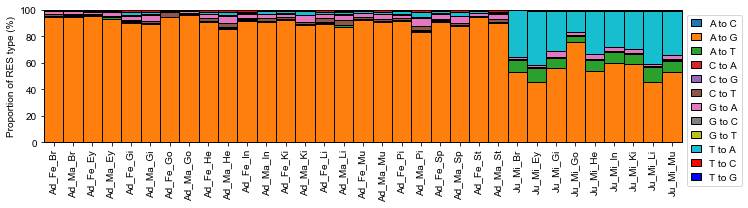

In [8]:
plt.figure(figsize=(10.5, 3))
xs = np.arange(len(ratios))
bottoms = np.zeros(len(ratios))
colors = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "red", "blue"]
for i, mtype in enumerate(mtypes):
    heights = ratios[mtype]
    plt.bar(xs, heights, bottom=bottoms, width=1, edgecolor="black", color=colors[i], 
            label="%s to %s" % (mtype[0], mtype[1]), clip_on=False)
    bottoms += heights
if True:
    ticks = ["%s_%s_%s" % (s[0:2], s[6:8], s[3:5]) for s in ratios.index]
else:
    ticks = ratios.index
plt.xticks(xs, ticks, rotation=90)
plt.xlim(-0.5, max(xs) + 0.5)
plt.ylim(0, 100)
plt.ylabel("Proportion of RES type (%)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), ncol=1, handlelength=1, frameon=True)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.tight_layout()
plt.savefig("figures/proportion_of_res_type.all.pdf", dpi=300)

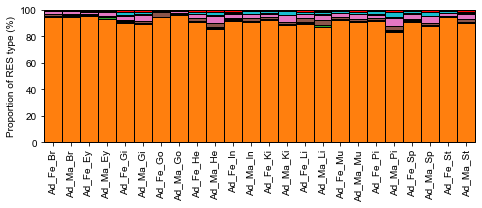

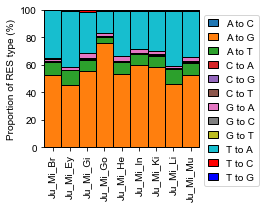

In [15]:
tmp = ratios.head(24)
plt.figure(figsize=(6.8, 3))
xs = np.arange(len(tmp))
bottoms = np.zeros(len(tmp))
colors = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "red", "blue"]
for i, mtype in enumerate(mtypes):
    heights = tmp[mtype]
    plt.bar(xs, heights, bottom=bottoms, width=1, edgecolor="black", color=colors[i], 
            label="%s to %s" % (mtype[0], mtype[1]), clip_on=False)
    bottoms += heights
if True:
    ticks = ["%s_%s_%s" % (s[0:2], s[6:8], s[3:5]) for s in tmp.index]
else:
    ticks = tmp.index
plt.xticks(xs, ticks, rotation=90)
plt.xlim(-0.5, max(xs) + 0.5)
plt.ylim(0, 100)
plt.ylabel("Proportion of RES type (%)")
# plt.legend(loc="upper left", bbox_to_anchor=(1, 1), ncol=1, handlelength=1, frameon=True)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.tight_layout()
plt.savefig("figures/proportion_of_res_type.adult.pdf", dpi=300)


tmp = ratios.tail(9)
plt.figure(figsize=(3.8, 3))
xs = np.arange(len(tmp))
bottoms = np.zeros(len(tmp))
colors = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "red", "blue"]
for i, mtype in enumerate(mtypes):
    heights = tmp[mtype]
    plt.bar(xs, heights, bottom=bottoms, width=1, edgecolor="black", color=colors[i], 
            label="%s to %s" % (mtype[0], mtype[1]), clip_on=False)
    bottoms += heights
if True:
    ticks = ["%s_%s_%s" % (s[0:2], s[6:8], s[3:5]) for s in tmp.index]
else:
    ticks = tmp.index
plt.xticks(xs, ticks, rotation=90)
plt.xlim(-0.5, max(xs) + 0.5)
plt.ylim(0, 100)
plt.ylabel("Proportion of RES type (%)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), ncol=1, handlelength=1, frameon=True)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.tight_layout()
plt.savefig("figures/proportion_of_res_type.juvenile.pdf", dpi=300)

In [11]:
ratios1 = ratios[[g.startswith("Ad_") for g in ratios.index]]
ratios2 = ratios[[g.startswith("Ju_") for g in ratios.index]]

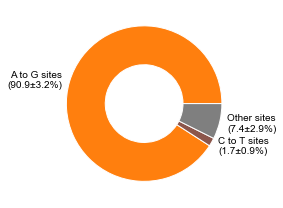

In [165]:
tmp = ratios.copy()
tmp["Others"] = 100 - tmp["AG"] - tmp["CT"]
tmp = tmp[["AG", "CT", "Others"]]
tmp = tmp[[g.startswith("Ad_") for g in tmp.index]]
means, stds = tmp.mean(), tmp.std()

plt.figure(figsize=(3.8, 3))
plt.pie(means, 
        colors=["C1", "C5", "C7"], 
        labels=[
            "A to G sites\n(%.1f±%.1f%%)" % (means[0], stds[0]),
            "C to T sites\n(%.1f±%.1f%%)" % (means[1], stds[1]),
            "Other sites\n(%.1f±%.1f%%)" % (means[2], stds[2]),
        ],
        wedgeprops=dict(width=0.5, edgecolor='w', linewidth=1))
plt.tight_layout()
plt.savefig("figures/proportion_of_ag.adult.pdf", dpi=300)

# RES number and expression level

In [6]:
# ADAR genes
gid_name_list = [
    ["adar", "adar"],
    ["LOC111218474", "adarb1a"],
    ["LOC111228258", "adarb2a"],
    ["LOC111232582", "adarb1b"],
    ["LOC111233848", "adarb2b"],
]

In [7]:
fpkm = pd.read_csv("../../3_integrate_isoforms/results/expression/stringtie/asm.gene_abund.tsv", sep="\t", index_col=0)
fpkm = fpkm[list(sorted(fpkm.columns))]

In [8]:
samples = [
    'Ju_Br_Mi_2', 'Ad_Br_Fe_4', 'Ad_Br_Ma_4',
    'Ju_Ey_Mi_2', 'Ad_Ey_Fe_4', 'Ad_Ey_Ma_3',
    'Ju_Gi_Mi_2', 'Ad_Gi_Fe_2', 'Ad_Gi_Ma_2',
    'Ju_Go_Mi_2', 'Ad_Go_Fe_2', 'Ad_Go_Ma_3',
    'Ju_He_Mi_2', 'Ad_He_Fe_2', 'Ad_He_Ma_2',
    'Ju_In_Mi_2', 'Ad_In_Fe_2', 'Ad_In_Ma_2',
    'Ju_Ki_Mi_2', 'Ad_Ki_Fe_2', 'Ad_Ki_Ma_2',
    'Ju_Li_Mi_2', 'Ad_Li_Fe_2', 'Ad_Li_Ma_2',
    'Ju_Mu_Mi_2', 'Ad_Mu_Fe_2', 'Ad_Mu_Ma_2',
    'Ad_Pi_Fe_2', 'Ad_Pi_Ma_2',
    'Ad_Sp_Fe_2', 'Ad_Sp_Ma_2',
    'Ad_St_Fe_2', 'Ad_St_Ma_2',
]

groups = [s[:-2] for s in samples]

In [9]:
rows = []
for sample in samples:
    path = "../../1_analysis_of_rna_seq/results/denovo_mapping/star/mapped.2nd/%s/Log.final.out" % sample
    with open(path) as f:
        for line in f:
            if "Number of input reads" in line:
                raw_reads = int(line.strip("\n").split()[-1])
    
    path = "../../3_integrate_isoforms/results/sprint/read/%s.txt" % sample
    total_reads = int(open(path).readlines()[0].strip())
    
    path = "../../3_integrate_isoforms/results/sprint/outputs/%s/SPRINT_identified_all.res" % sample
    d = pd.read_csv(path, sep="\t", header=0)
    d = d[d["#Chrom"] != "NC_016870.1"]
    counter = defaultdict(int)
    supporting_reads = 0
    sites = 0
    for tp, strand, reads in d[["Type", "Strand", "Supporting_reads"]].values:
        if (tp == "AG" and strand == "+") or (tp == "TC" and strand == "-"):
            sites += 1
            supporting_reads += reads
    row = [sites, raw_reads, total_reads, supporting_reads]
    rows.append(row)

In [10]:
dat = pd.DataFrame(rows, columns=["Sites", "RawReads", "TotalReads", "SupportingReads"], index=pd.Index(groups, name="Group"))
dat["Level"] = dat["SupportingReads"] / dat["TotalReads"]

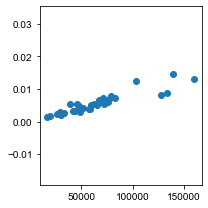

In [11]:
plt.figure(figsize=(3, 3))
plt.scatter(dat["Sites"], dat["Level"])
plt.tight_layout()
plt.show()

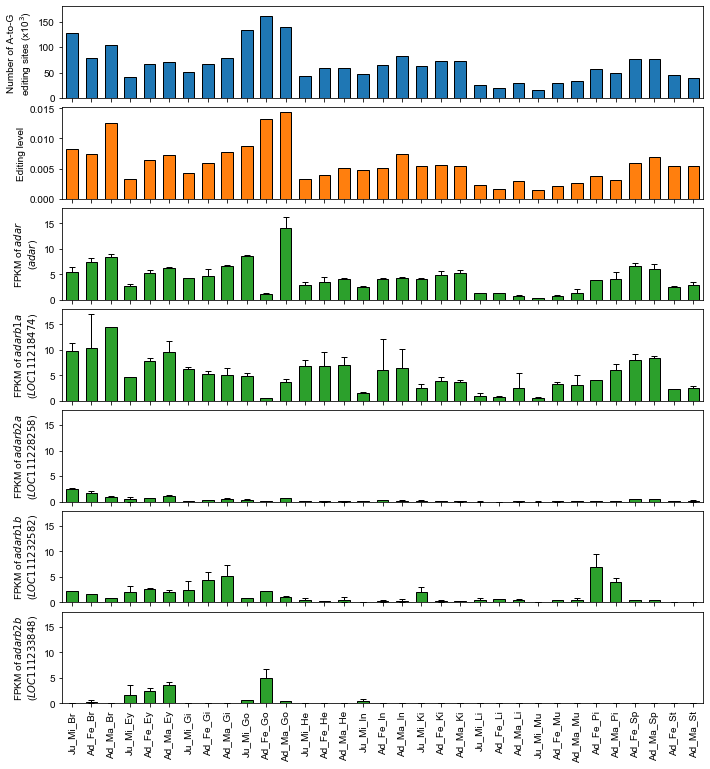

In [15]:
w = 0.6

fig, axs = plt.subplots(7, 1, figsize=(10, 11), sharex=True, gridspec_kw=dict(hspace=0.1, left=0.08, right=0.97, bottom=0.1, top=0.98))

plt.sca(axs[0])
ys = dat["Sites"] / 1e3
xs = np.arange(len(ys))
plt.bar(xs, ys, width=w, edgecolor="black", color="C0")
plt.xlim(min(xs) - 0.5, max(xs) + 0.5)
plt.ylim(0, 180)
plt.ylabel("Number of A-to-G\nediting sites (x10$^3$)")

plt.sca(axs[1])
ys = dat["Level"]
xs = np.arange(len(ys))
plt.bar(xs, ys, width=w, edgecolor="black", color="C1")
plt.xlim(min(xs) - 0.5, max(xs) + 0.5)
plt.ylabel("Editing level")

for i, (gid, gname) in enumerate(gid_name_list):
    plt.sca(axs[i + 2])
    
    m = pd.DataFrame(fpkm.loc[gid].values.reshape((-1, 2)))
    m.columns = ["Rep1", "Rep2"]
    m.index = [s[:-2] for s in fpkm.columns.values.reshape((-1, 2))[:,0]]
    m.index.name = "Group"
    m = m.loc[groups]
    means = m.mean(axis=1)
    stds = m.std(axis=1)
    xs = np.arange(len(means))
    
    plt.bar(xs, means, yerr=stds, edgecolor="black", color="C2", width=w,
            error_kw=dict(capsize=3, lw=1, zorder=0), zorder=1)
    plt.ylabel("FPKM of $\it{%s}$\n($\it{%s}$)" % (gname, gid))
    plt.ylim(0, 18)
    
    if i == 4:
        if True:
            ticks = ["%s_%s_%s" % (g[0:2], g[6:8], g[3:5]) for g in groups]
        else:
            ticks = groups
        plt.xticks(xs, ticks, rotation=90)

# plt.tight_layout()
plt.savefig("figures/res_number_and_adar_fpkm.all.pdf", dpi=300)

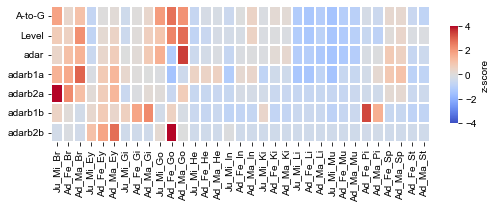

In [14]:
selected_samples = [
    'Ju_Br_Mi_2', 'Ad_Br_Fe_4', 'Ad_Br_Ma_4',
    'Ju_Go_Mi_2', 'Ad_Go_Fe_2', 'Ad_Go_Ma_3',
    'Ju_Li_Mi_2', 'Ad_Li_Fe_2', 'Ad_Li_Ma_2',
    'Ju_Mu_Mi_2', 'Ad_Mu_Fe_2', 'Ad_Mu_Ma_2',
]
selected_groups = [s[:-2] for s in selected_samples]
selected_groups = groups

rows = []

rows.append(list(dat["Sites"][selected_groups]))
rows.append(list(dat["Level"][selected_groups]))


for gid, gname in gid_name_list:
    vs = fpkm.loc[gid]
    row = []
    for group in selected_groups:
        vs1 = vs[[s.startswith(group) for s in vs.index]]
        v = np.mean(vs1)
        row.append(v)
    rows.append(row)
m = pd.DataFrame(rows)
if True:
    m.columns = ["%s_%s_%s" % (g[0:2], g[6:8], g[3:5]) for g in selected_groups]
else:
    m.columns = selected_groups
    
m.index = ["A-to-G", "Level"] + [gname for gid, gname in gid_name_list]
zscore = m.subtract(m.mean(axis=1), axis=0).divide(m.std(axis=1), axis=0)


plt.figure(figsize=(7, 3))
sns.heatmap(zscore, cmap="coolwarm", lw=1, vmin=-4, vmax=4, cbar=True, 
            cbar_kws=dict(orientation="vertical", fraction=0.02, aspect=12, label="z-score"))
plt.tight_layout()
plt.savefig("figures/ag_level_fpkm.heatmap.pdf", dpi=300)

# Distribution

In [197]:
from pyBioInfo.Range import GRange
from pyBioInfo.IO.File import GtfFile, GtfTranscriptBuilder
from pyBioInfo.Utils import ShiftLoader

In [198]:
f_gtf = "../../3_integrate_isoforms/results/assembly/asm.final.sorted.gtf.gz"
with GtfFile(f_gtf) as f:
    records = [x for x in f]
transcripts = list(sorted(GtfTranscriptBuilder(records)))

In [314]:
counter_list = []
for sample in samples:
    path = "../../3_integrate_isoforms/results/sprint/outputs/%s/SPRINT_identified_regular.res" % sample
    d = pd.read_csv(path, sep="\t", header=0)
    d = d[d["#Chrom"] != "NC_016870.1"]
    sites = []
    for chrom, start, tp, strand in d[["#Chrom", "Start(0base)", "Type", "Strand"]].values:
        if (tp == "AG" and strand == "+") or (tp == "TC" and strand == "-"):
            obj = GRange(chrom=chrom, start=start, end=start + 1, name=tp, strand=strand)
            sites.append(obj)
    sites.sort()
    
    width = 2000
    loader = ShiftLoader(transcripts)
    counter = defaultdict(int)
    for site in sites:
        locs = []
        for transcript in loader.fetch(chrom=site.chrom, start=site.start - width, end=site.end + 1 + width):
            if transcript.thick is None:
                continue
            if transcript.start <= site.start < transcript.end:
                if site.strand == transcript.strand:
                    try:
                        idx = transcript.index(site.start)
                        locs.append("Exon")
                    except ValueError:
                        locs.append("Intron")
            else:
                if transcript.strand == "+" and site.start < transcript.start:
                    locs.append("Promoter")
                elif transcript.strand == "-" and site.start >= transcript.end:
                    locs.append("Promoter")
        locs = set(locs)
        if "Exon" in locs:
            loc = "Exon"
        elif "Intron" in locs:
            loc = "Intron"
        elif "Promoter" in locs:
            loc = "Promoter"
        else:
            loc = "Intergenic"
        counter[loc] += 1
    counter_list.append(counter)

In [319]:
dat = pd.DataFrame(counter_list, index=groups)
dat.divide(dat.sum(axis=1), axis=0)
dat = dat.divide(dat.sum(axis=1), axis=0)
dat.head()

,Exon,Intron,Intergenic,Promoter
Ju_Br_Mi,0.576158,0.257133,0.141140,0.025569
Ad_Br_Fe,0.666902,0.174138,0.138451,0.020509
Ad_Br_Ma,0.655490,0.190663,0.137176,0.016670
Ju_Ey_Mi,0.699759,0.156662,0.126248,0.017330
Ad_Ey_Fe,0.679434,0.184910,0.117228,0.018427


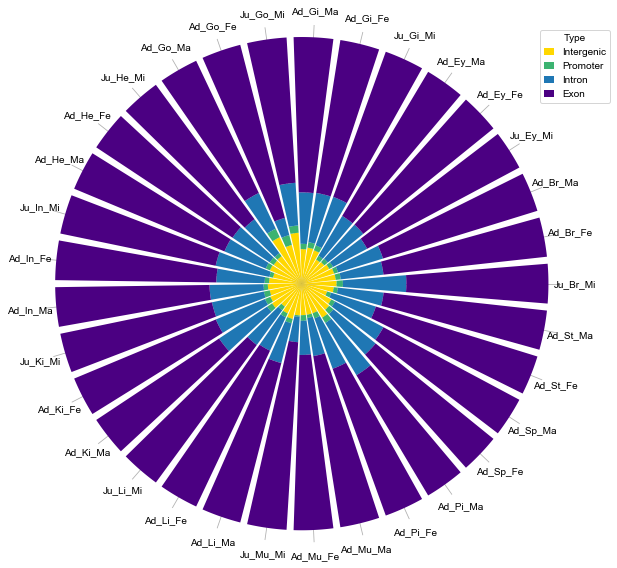

In [342]:
colors = ["gold", "mediumseagreen", "C0", "indigo"]
xs = np.linspace(0.0, 2 * np.pi, len(groups), endpoint=False)
ys0 = np.zeros(len(xs))
w = xs[1] - xs[0]

plt.figure(figsize=(9, 8))
ax = plt.subplot(projection='polar')
for i, name in enumerate(["Intergenic", "Promoter", "Intron", "Exon"]):
    ys = dat[name]
    plt.bar(xs, ys, width=w * 0.85, bottom=ys0, color=colors[i], label=name, zorder=10, alpha=1)
    ys0 += ys
ax.set_rmax(1.05)
ax.set_rticks([])
# ax.set_rgrids([0, 0.2, 0.4, 0.6, 0.8, 1.0])
lines, labels = ax.set_thetagrids(xs * 360 / (2 * np.pi), groups, zorder=0)
ax.spines["polar"].set_visible(False)
plt.legend(handlelength=1, loc="upper left", bbox_to_anchor=(0.95, 1), title="Type")
plt.tight_layout()
plt.savefig("figures/distribution_of_ag.pdf", dpi=300)

# Motif

In [2]:
def load_sequences(f_res, f_fasta, width):
    seqs = []
    with FastaFile(f_fasta) as fasta:
        d = pd.read_csv(f_res, sep="\t")
        d = d[d["#Chrom"] != "NC_016870.1"]
        for chrom, start, tp, strand in d[["#Chrom", "Start(0base)", "Type", "Strand"]].values:
            if tp == "AG" and strand == "+":
                pos1 = start - width
            elif tp == "TC" and strand == "-":
                pos1 = start - width
            else:
                continue
            pos2 = pos1 + 2 * width + 1
            try:
                seq = fasta.fetch(chrom=chrom, start=pos1, end=pos2, strand=strand).upper()
                seqs.append(seq)
            except Exception:
                continue
    return seqs

In [5]:
width = 5
f_fasta = "../../common/ncbi_Sdu_1.0/GCF_002260705.1_Sdu_1.0_genomic.fa"

for sample in info["Sample"]:
    if "Go" not in sample:
        continue
    print(sample)
    
    path = "../../3_integrate_isoforms/results/sprint/outputs/%s/SPRINT_identified_regular.res" % sample
    seqs = load_sequences(path, f_fasta, width)
    
    bases = "ACGTN"
    m = np.zeros((len(bases), width * 2 + 1))
    for seq in seqs:
        for i, base in enumerate(seq):
            j = bases.index(base)
            m[j][i] += 1
    m = pd.DataFrame(m, index=list(bases), columns=np.arange(-width, width + 1))
    m = m / m.sum(axis=0)
    
    if True:
        f_pwm = "results/%s.pwm.csv" % sample
        f_logo = "results/%s.seqlogo" % sample
        tmp = m.copy()
        tmp = tmp.loc[["A", "C", "G", "T"]]
        tmp.index = ["A", "C", "G", "U"]
        tmp.to_csv(f_pwm)
        
        cmd = "./plot_seqlogo.R %s %s" % (f_pwm, f_logo)
        assert os.system(cmd) == 0
    
    
    if False:
        plt.figure(figsize=(3, 1.5))
        xs = m.columns
        bottoms = np.zeros(len(xs))
        for base in bases[:4]:
            ys = m.loc[base]
            plt.bar(xs, ys, bottom=bottoms, label=base)
            bottoms += ys
        plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
        plt.tight_layout()
        plt.show()
        plt.close()
    # break

Ju_Go_Mi_1
Ju_Go_Mi_2
Ad_Go_Ma_2
Ad_Go_Ma_3
Ad_Go_Fe_1
Ad_Go_Fe_2


In [47]:
for sample in info["Sample"]:
    for width in [50, 100]:
        path = "../../3_integrate_isoforms/results/sprint/outputs/%s/SPRINT_identified_regular.res" % sample
        seqs = load_sequences(path, f_fasta, width)
        path = "results/sequences/%s.width%d.fasta" % (sample, width)
        with open(path, "w+") as fw:
            for i, seq in enumerate(seqs):
                fw.write(">seq%d\n" % i)
                fw.write("%s\n" % seq)

In [2]:
for infile in glob.glob("results/sequences/*.fasta"):
    name = os.path.splitext(os.path.basename(infile))[0]
    outdir = "results/homer/%s" % name
    log = "results/homer/%s.log" % name
    cmd = "findMotifs.pl %s fasta %s -len 5,7,9,11,13 -p 80 -rna > %s 2>&1" % (infile, outdir, log)
    print(cmd)
    assert os.system(cmd) == 0

findMotifs.pl results/sequences/Ju_Go_Mi_2.width100.fasta fasta results/homer/Ju_Go_Mi_2.width100 -len 5,7,9,11,13 -p 80 -rna > results/homer/Ju_Go_Mi_2.width100.log 2>&1
findMotifs.pl results/sequences/Ju_Go_Mi_1.width100.fasta fasta results/homer/Ju_Go_Mi_1.width100 -len 5,7,9,11,13 -p 80 -rna > results/homer/Ju_Go_Mi_1.width100.log 2>&1
findMotifs.pl results/sequences/Ad_He_Fe_1.width100.fasta fasta results/homer/Ad_He_Fe_1.width100 -len 5,7,9,11,13 -p 80 -rna > results/homer/Ad_He_Fe_1.width100.log 2>&1
findMotifs.pl results/sequences/Ad_He_Fe_1.width50.fasta fasta results/homer/Ad_He_Fe_1.width50 -len 5,7,9,11,13 -p 80 -rna > results/homer/Ad_He_Fe_1.width50.log 2>&1
findMotifs.pl results/sequences/Ad_Gi_Fe_2.width100.fasta fasta results/homer/Ad_Gi_Fe_2.width100 -len 5,7,9,11,13 -p 80 -rna > results/homer/Ad_Gi_Fe_2.width100.log 2>&1
findMotifs.pl results/sequences/Ju_In_Mi_1.width50.fasta fasta results/homer/Ju_In_Mi_1.width50 -len 5,7,9,11,13 -p 80 -rna > results/homer/Ju_In_Mi

AssertionError: 